# Regresja logistyczna

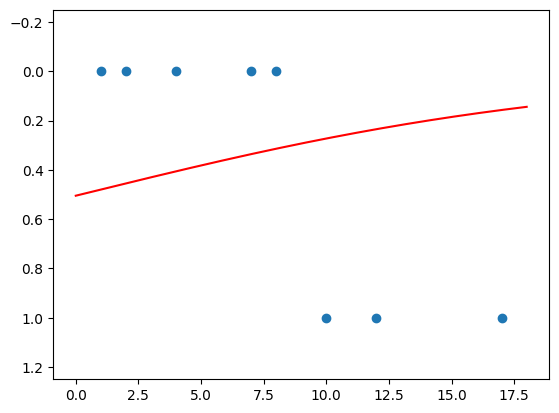

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import math

def transformation(x):
    #return -0.1*x + 0.02
    a = -0.1
    b = 0.02
    return 1/(1+(math.e)**(-(a*x + b)))
    
X = [1,2,4,7,8,10,12,17] #rozmiary guzów
Y = [0,0,0,0,0,1,1,1] #flaga (decyzja) oceniająca ich złośliwość - 1=złośliwy / 0=niezłośliwy
function_sampling_x_coordinates = np.linspace(0,18,500) #generowanie 500 punktów pomiędzy granicami osi X (0,18) 
function_sampling_y_coordinates = [transformation(x) for x in function_sampling_x_coordinates] #wyznaczanie wartosci funkcji transformation w tych punktach 

plt.plot(X, Y, "o")
plt.plot(function_sampling_x_coordinates, function_sampling_y_coordinates, 'r-')
plt.ylim(bottom = 1.25, top = -0.25)

plt.show()

## Zadanie 1
Zamień postać funkcji `transformation` tak, aby stworzyła krzywą logistyczną dla naszych danych za pomocą funkcji sigmoidalnej postaci:
$$\frac{1}{1+e^{-(ax+b)}}$$

Jaki wpływ ma zmiana wartości parametru a na funkcję?

<span style="color:red">**Odpowiedź:** Im większa wartość bezwzględna |a|, tym bardziej funkcja transformation przestaje przypominać funkcję liniową o kącie nachylenia do osi OX różnym od 0. Jest to oczywista obserwacja, gdyż w mianowniku powyższego wyrażenia znajduje się funkcja wykładnicza. Dla dużych wartości bezwzględnych |a| przy dodatnim a, funkcja szybko dąży do 1, a przy ujemnym do 0. Dodatkowo w tym konkretnym przypadku na wykresie widać jeszcze znaczącą różnicę w tempie przyrostu wartości funkcji ze względu na bliskość argumentów x do 0.</span>

Jaki wpływ ma zmiana wartości parametru b na funkcję?

<span style="color:red">**Odpowiedź:** Im większe b, tym bliższe 0 przyjmuje funkcja transformation. Im mniejsze tym bliższe 1.</span>

## Zadanie 2
Na podstawie dokumentacji sklearn, stwórz klasyfikator `LogisticRegression` i wytrenuj go odpowiednio, aby dobrze separował przestrzeń.

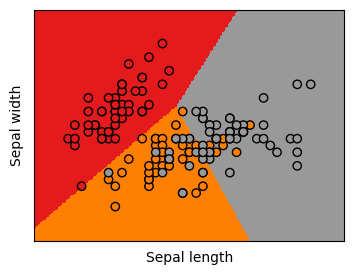

Dokładność modelu: 0.82


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
from helpers_lab2 import plot_boundary

iris = datasets.load_iris()
X = iris.data[:, :2]  #weź tylko dwie cechy przykładowego zbioru
Y = iris.target # Y to klasy, które chcemy przewidzieć

# Stwórz instancję klasyfikatora LogisticRegression
logreg = LogisticRegression()

# Trenuj klasyfikator na danych
logreg.fit(X, Y)

# Wyświetl granicę decyzyjną
plot_boundary(logreg, X, Y)

# Oceń dokładność modelu na danych treningowych
accuracy = logreg.score(X, Y)
print(f"Dokładność modelu: {accuracy}")


# Sieci neuronowe

## Zadanie 3:
Odwiedź stronę [playground.tensorflow.org](http://playground.tensorflow.org)

Zredukuj sieć neuronową do minimalnej postaci (0 hidden layers; nie zmieniaj kolumny features) i rozpocznij proces uczenia na problemie nr 3 (dwa rozdzielne skupiska- ang.Gaussian) - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? (spójrz na wizualizację oraz wykres training/test loss)

<span style="color:red">**Odpowiedź:** Tak, nauczyła się. Akurat takie dane pozwalają na użycie tak prostej sieci neuronowej.</span>

Czy dodawanie warstw ukrytych coś zmienia w kontekście wyuczenia? a w kontekście czasu wyznaczania granicy decyzyjnej?

<span style="color:red">**Odpowiedź:** W tym konkretnym przypadku nie zmienia prawie nic w kontekście wyuczenia, bo dokładność klasyfikacji i tak była bardzo bliska 100%. Za to im więcej warstw, tym cała sieć działa wolniej: (potrzebuje więcej czasu na obliczenia w każdej iteracji i wolniej osiąga zadowalającą dokładność.)</span>

Zmień zbiór danych na pierwszy (niebieska chmura wewnątrz pomarańczowej obręczy); czy tutaj minimalna sieć uczy się odpowiednio? Odpowiedź uzasadnij.

<span style="color:red">**Odpowiedź:** Nie, tak prosta sieć nie ma szans uczyć się odpowiednio, gdyż danych nie można rozdzielić linią prostą, a tylko i wyłącznie do tego zadania jest zdolny omawiany model.</span>

Jak sprawić, aby sieć zaczęła dobrze działać na zbiorze nr 1? Rozważ niezbędne modyfikacje (preferuj najprostsze sposoby) zarówno w kolumnie features, jak i manipulacje warstwami ukrytymi (hidden layers).

<span style="color:red">**Odpowiedź:** Najprostszy sposób, to podać na wejściu 2 inne informacje o danych wejściowych (features x<sub>1</sub><sup>2</sup> oraz x<sub>2</sub><sup>2</sup>). Wtedy nie trzeba dodawać żadnych warstw ukrytych. Jeśli natomiast możemy manipulować tylko warstwami ukrytymi, to wystarczy użyć 1 warstwy ukrytej z 3 neuronami.</span>

## Zadanie 4

Na podstawie dokumentacji sklearn, stwórz `MLPClassifier`, wytrenuj go a następnie użyj wytrenowanego modelu do przewidywania etykiet na zbiorze testowym.
Utwórz klasyfikator w zmiennej `mlp`, a listę przewidzianych etykiet umieść w obiekcie `predicted`. Doprowadź do sytuacji, w której masz nie więcej niż 8 błędów na zbiorze testowym.

[[35  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 38  1  0  0  0  0]
 [ 0  0  0  0  1 28  0  0  1  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 43  0  1]
 [ 0  1  1  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  1 34]]

errors: 8


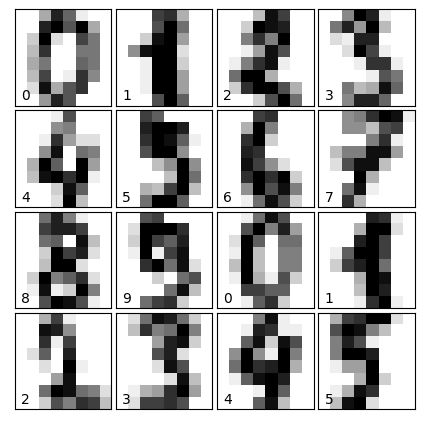

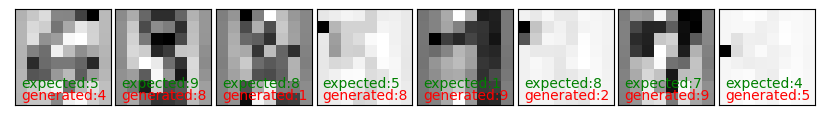

In [31]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

%matplotlib inline
digits = load_digits() #zbiór zawiera 1797 obrazków reprezentujących cyfry od 0 do 9 (czyli 10 klas decyzyjnych)

fig = plt.figure(figsize = (4,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(16):
    #wyświetl próbkę 16 obrazków wraz z ich prawdziwymi etykietami
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

# Proces uczenia - Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp.fit(X_train, y_train) # Rezultaty klasyfikacji dla danych testujących

# Predict using the trained model
predicted = mlp.predict(X_test)

if predicted is not None:
    # Wizualizacja macierzy pomyłek - pokazuje jakie etykiety pomylono z jakimi innymi
    cm = confusion_matrix(y_test,predicted)
    print(cm)

    expected = y_test 
    fig = plt.figure(figsize=(8, 8))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    # Wizualizacja błędnie zaanotowanych obrazków
    cnt = 0
    for i in range(len(X_test)):
        if predicted[i] == expected[i]:
            continue
        ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
        ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
        cnt += 1

        ax.text(0, 7, "generated:" + str(predicted[i]), color='red')
        ax.text(0, 6, "expected:" + str(expected[i]), color='green')
    print('\nerrors:',cnt)